# Importing csv

In [2]:
import pandas as pd

plants=pd.read_csv('../plantbase/data/plants_with_image_dimensions_v1.csv').drop(columns='Unnamed: 0')

In [3]:
plants.head(10)

,id,family,genus,species,content,filename,image_height,image_width
0,1,Amaryllidaceae,Narcissus,Narcissus dubius Gouan,Entire,1.jpg,512,800
1,100014,Scrophulariaceae,Verbascum,Verbascum pulverulentum Vill.,Leaf,100014.jpg,600,800
2,100022,Orchidaceae,Ophrys,Ophrys scolopax Cav.,Entire,100022.jpg,587,800
3,100038,Iridaceae,Iris,Iris lutescens Lam.,Flower,100038.jpg,600,800
4,100069,Rosaceae,Crataegus,Crataegus azarolus L.,Stem,100069.jpg,800,533
5,100110,Amaryllidaceae,Galanthus,Galanthus nivalis L.,Entire,100110.jpg,533,800
6,100120,Scrophulariaceae,Verbascum,Verbascum thapsus L.,Fruit,100120.jpg,533,800
7,100133,Asparagaceae,Hyacinthoides,Hyacinthoides non-scripta (L.) Chouard ex Rothm.,Flower,100133.jpg,533,800
8,100134,Campanulaceae,Campanula,Campanula rhomboidalis L.,Leaf,100134.jpg,533,800
9,10019,Orchidaceae,Ophrys,Ophrys apifera Huds.,Flower,10019.jpg,600,800


# Exploring the 'content' column

In [4]:
#sorting the dataset by genus and content 
contents=plants.groupby(["genus", "content"]).size().reset_index(name="count")
contents.head(15)

,genus,content,count
0,Campanula,Branch,49
1,Campanula,Entire,171
2,Campanula,Flower,365
3,Campanula,Fruit,6
4,Campanula,Leaf,69
5,Campanula,Stem,13
6,Crataegus,Branch,91
7,Crataegus,Entire,40
8,Crataegus,Flower,175
9,Crataegus,Fruit,107


In [5]:
#sorting the dataset by genus and count 
contents=contents.sort_values(['genus','count'],ascending=[True, False])

contents.head(15)

,genus,content,count
2,Campanula,Flower,365
1,Campanula,Entire,171
4,Campanula,Leaf,69
0,Campanula,Branch,49
5,Campanula,Stem,13
3,Campanula,Fruit,6
11,Crataegus,LeafScan,330
8,Crataegus,Flower,175
10,Crataegus,Leaf,167
9,Crataegus,Fruit,107


In [6]:
#understanding how many content cateogories by plants
contents.groupby('genus').count().drop(columns='content')

,count
genus,
Campanula,6
Crataegus,7
Galanthus,4
Geranium,7
Hyacinthoides,6
Hydrangea,5
Iris,5
Jasminum,6
Lavandula,4


# Filtering the overall dataset by selected content type 

In [7]:
#filtering the csv dataset by 'Flowers', 'Entire', 'Leaf' content types
plants=plants[(plants.content == 'Entire') | (plants.content == 'Flower')]

In [8]:
plants.head()

,id,family,genus,species,content,filename,image_height,image_width
0,1,Amaryllidaceae,Narcissus,Narcissus dubius Gouan,Entire,1.jpg,512,800
2,100022,Orchidaceae,Ophrys,Ophrys scolopax Cav.,Entire,100022.jpg,587,800
3,100038,Iridaceae,Iris,Iris lutescens Lam.,Flower,100038.jpg,600,800
5,100110,Amaryllidaceae,Galanthus,Galanthus nivalis L.,Entire,100110.jpg,533,800
7,100133,Asparagaceae,Hyacinthoides,Hyacinthoides non-scripta (L.) Chouard ex Rothm.,Flower,100133.jpg,533,800


In [9]:
plants.to_csv("../plantbase/data/filtered_contents.csv")

# Loading the content images

In [23]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd

In [24]:
np.unique(plants.genus.values)

array(['Campanula', 'Crataegus', 'Galanthus', 'Geranium', 'Hyacinthoides',
       'Hydrangea', 'Iris', 'Jasminum', 'Lavandula', 'Narcissus',
       'Ophrys', 'Rhododendron', 'Rosa', 'Tulipa', 'Verbascum',
       'Wisteria'], dtype=object)

In [45]:
r"../raw_data/train/"

'../raw_data/train/'

In [49]:
#creating sub-folders
def create_folder():
    """takes each unique genus as a category,
    then creates a new folder for that genus if one doesn't already exist"""
    categories = np.unique(plants.genus.values)
    for genus in categories:
        folder = r"../raw_data/train/" + str(genus)
        if not os.path.exists(folder):
            os.mkdir(folder)
            print('created folder', genus)
        else:
            print(str(genus), 'exists!')

In [50]:
create_folder()

created folder Campanula
created folder Crataegus
created folder Galanthus
created folder Geranium
created folder Hyacinthoides
created folder Hydrangea
created folder Iris
created folder Jasminum
created folder Lavandula
created folder Narcissus
created folder Ophrys
created folder Rhododendron
created folder Rosa
created folder Tulipa
created folder Verbascum
created folder Wisteria


In [51]:
#moving the images into the right folders

def move_files():
    """
    iterates over the rows in plants,
    moves the original file into the new_filename location"""
    
    failed = 0
    for i, row in plants.iterrows():
        new_filename = rf"../raw_data/train/{row.genus}/{row.filename}"
        old_filename = rf"../raw_data/train/{row.filename}"
        if not os.path.exists(new_filename):
            try:
                os.rename(old_filename, new_filename)
                print(f"moved {row.filename} to {row.genus}")
            except:
                failed += 1
        else:
            print(f"{row.filename} is in {row.genus}")
            
    print(f"failed on {failed} files")

In [52]:
move_files()

moved 100334.jpg to Rosa
moved 100406.jpg to Verbascum
moved 100451.jpg to Campanula
moved 100631.jpg to Ophrys
moved 100902.jpg to Geranium
moved 100945.jpg to Jasminum
moved 100964.jpg to Galanthus
moved 101143.jpg to Rhododendron
moved 101389.jpg to Rosa
moved 101638.jpg to Campanula
moved 101836.jpg to Tulipa
moved 101924.jpg to Tulipa
moved 103019.jpg to Narcissus
moved 103098.jpg to Geranium
moved 103183.jpg to Narcissus
moved 103342.jpg to Verbascum
moved 10364.jpg to Ophrys
moved 103716.jpg to Verbascum
moved 103765.jpg to Hydrangea
moved 103951.jpg to Narcissus
moved 10397.jpg to Iris
moved 104019.jpg to Campanula
moved 10407.jpg to Ophrys
moved 104220.jpg to Verbascum
moved 104273.jpg to Ophrys
moved 104464.jpg to Ophrys
moved 104571.jpg to Geranium
moved 10506.jpg to Ophrys
moved 105172.jpg to Ophrys
moved 105962.jpg to Geranium
moved 106150.jpg to Iris
moved 106280.jpg to Narcissus
moved 106493.jpg to Rosa
moved 106643.jpg to Geranium
moved 106670.jpg to Crataegus
moved 106

moved 56512.jpg to Verbascum
moved 5662.jpg to Verbascum
moved 5675.jpg to Ophrys
moved 56784.jpg to Geranium
moved 56910.jpg to Geranium
moved 56960.jpg to Verbascum
moved 56990.jpg to Geranium
moved 57204.jpg to Ophrys
moved 57593.jpg to Iris
moved 57818.jpg to Ophrys
moved 57939.jpg to Crataegus
moved 5798.jpg to Campanula
moved 58354.jpg to Narcissus
moved 58449.jpg to Rosa
moved 58504.jpg to Verbascum
moved 58569.jpg to Campanula
moved 5861.jpg to Ophrys
moved 58898.jpg to Narcissus
moved 58986.jpg to Ophrys
moved 59005.jpg to Galanthus
moved 59047.jpg to Verbascum
moved 59640.jpg to Narcissus
moved 59913.jpg to Verbascum
moved 60158.jpg to Verbascum
moved 60691.jpg to Geranium
moved 6070.jpg to Verbascum
moved 61277.jpg to Campanula
moved 613.jpg to Campanula
moved 61318.jpg to Ophrys
moved 61392.jpg to Rosa
moved 61548.jpg to Crataegus
moved 61665.jpg to Narcissus
moved 61911.jpg to Crataegus
moved 62409.jpg to Verbascum
moved 62503.jpg to Iris
moved 62509.jpg to Lavandula
moved

# Loading images

In [53]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [54]:
directory = r"../raw_data/train/"

In [55]:
train_dataset = image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=123,
    validation_split=0.2, subset="training", interpolation='bilinear', follow_links=False
)

Found 477 files belonging to 16 classes.
Using 382 files for training.


In [56]:
class_names = train_dataset.class_names

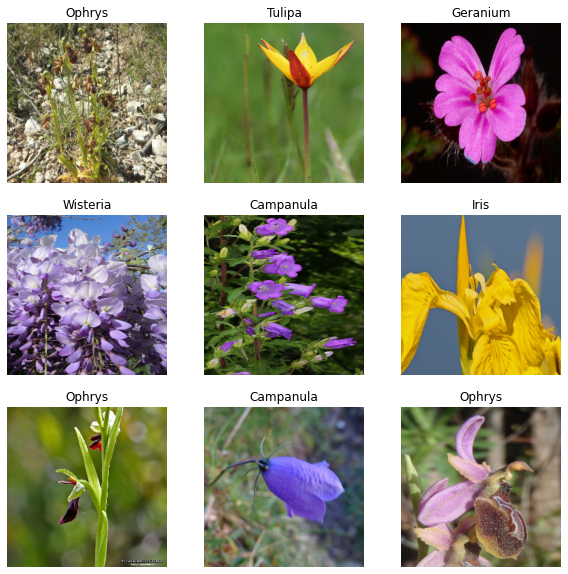

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Baseline CNN model

Requirements

In [68]:
from __future__ import print_function

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import preprocess_input

In [69]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [70]:
val_dataset = image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=123,
    validation_split=0.2, subset="validation", interpolation='bilinear', follow_links=False)

Found 477 files belonging to 16 classes.
Using 95 files for validation.


In [71]:
from tensorflow.keras import layers

In [72]:
img_height, img_width = (256,256)

In [79]:
# num_classes = 16

# model = Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(64, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [83]:
def build_model():
    
    model = Sequential()
    model.add(Conv2D(16, (3,3), strides=(1,1), padding='valid', input_shape=(img_height, img_width, 3), activation='relu'))
    model.add(MaxPooling2D(3))
    
    model.add(Conv2D(60, (2, 2), padding='same', activation='relu'))
    model.add(MaxPooling2D(3))
    
    model.add(Conv2D(50, (2, 2), padding='same', activation='relu'))
    model.add(MaxPooling2D(3))
    
    model.add(Flatten())
    model.add(Dense(25))
    model.add(Activation('softmax'))
    
    return model

model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 84, 84, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 84, 84, 60)        3900      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 50)        12050     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 9, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4050)             

In [84]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='min')

In [74]:
# import tensorflow.keras.losses 

# model.compile(optimizer='adam',
#               loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['f1']) # accuracy may not work on unbalanced data, trial on f1 

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 84, 84, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 84, 84, 60)        3900      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 50)        12050     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 9, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4050)             

In [87]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [88]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/10


ValueError: in user code:

    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    c:\users\user\.venvs\lewagon\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 25) are incompatible


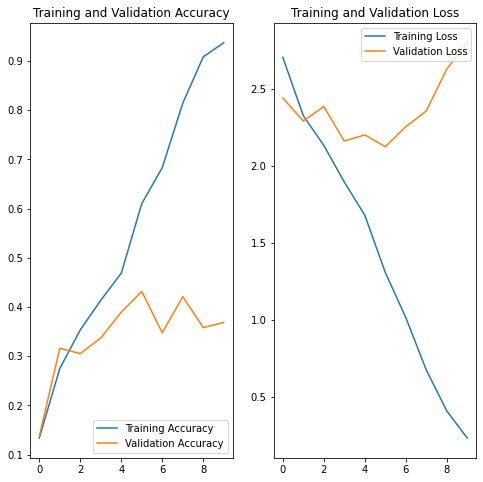

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()